# South African Language Identification

South Africa is a multicultural society characterised by linguistic diversity.
The country is multilingual with 11 official languages all of equal status. 
Most South Africans are multilingual and able to speak at least two or more of the official languages.
This project is aimed at classifing a group of text into the 11 official languages of South Africa.

# Importing Packages

Importing relevant modules and packages for the project 

In [135]:
import numpy as np
from comet_ml import Experiment
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import string
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline

# Loading Data

In [109]:
df = pd.read_csv('train_set.csv')
dft = pd.read_csv('test_set.csv')

The data has been imported above, and a brief overview of it is seen below. 

In [110]:
df.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


Below is a code to view the unique language entries in our train data set

In [111]:
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [112]:
dft.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


# Data Preprocessing

From observation above, the train data is clean and read to use but there are a few concerns about the test data as it still contains capital letters, puntcuations, numbers and some special characters, therefore, a brief preprocessing of our test data is required. 

In [140]:
#The below code converts all letters in the text column to lower case.
dft['text'] = dft['text'].str.lower()

In [141]:
#This funcion removes punctuations from texts
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [142]:
dft['text'] = dft['text'].apply(remove_punctuation)

In [144]:
#This funcion removes numbers from texts
def review_to_words(raw_message):
    pattern = r'[0-9]'
    new_string = re.sub(pattern, '', raw_message)
    return new_string

In [145]:
dft['text'] = dft['text'].apply(review_to_words)

In [146]:
dft.head(20)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...
6,7,fn am final gems birthing optionszulutxtfn
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


# Creating Features

In [147]:
X = df['text']
y = df['lang_id']

In [148]:
X_o = dft['text']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=0)

In [122]:
count_vectorizer = CountVectorizer()

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)
count_test_real = count_vectorizer.transform(X_o)

In [123]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Building Models

accuracy:   1.000
Confusion matrix, without normalization


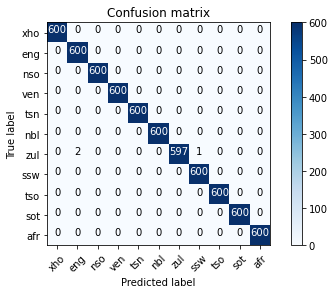

In [124]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])

In [125]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred_mnb = mnb.predict(count_test_real)

In [126]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_mnb = dft[['index']]
kaggle_mnb['lang_id']= pred_mnb
kaggle_mnb.to_csv('lang_class_mnb.csv', index = None)

# passive aggressive classifier

accuracy:   0.996
Confusion matrix, without normalization


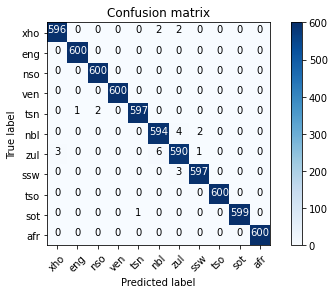

In [127]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso','sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso','sot', 'afr'])

# bigrams

In [128]:
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.997
Confusion matrix, without normalization


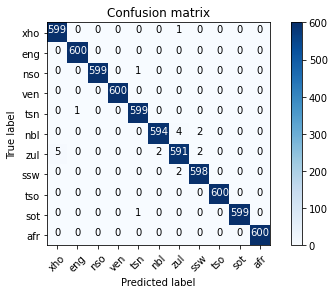

In [129]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso','sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso','sot', 'afr'])

In [130]:
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2_real = tfidf_vectorizer2.transform(X_o)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred_pac_bigrams = pass_tf.predict(tfidf_test_2_real)

In [131]:
kaggle_file = dft[['index']]
kaggle_file['lang_id']= pred_pac_bigrams
kaggle_file.to_csv('lang_class_bigrams.csv', index = None)

# trigrams

accuracy:   0.997
Confusion matrix, without normalization


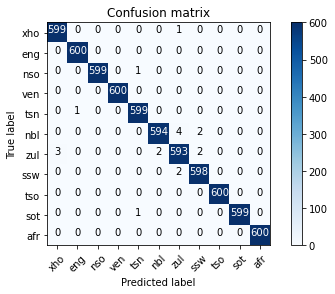

In [132]:
tfidf_vectorizer3 = TfidfVectorizer(max_df=0.6, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso','sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso','sot', 'afr'])

In [133]:
tfidf_vectorizer3 = TfidfVectorizer(max_df=0.6, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3_real = tfidf_vectorizer3.transform(X_o)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred_pac_trigrams = pass_tf.predict(tfidf_test_3_real)

In [134]:
kaggle_file = dft[['index']]
kaggle_file['lang_id']= pred_pac_trigrams
kaggle_file.to_csv('lang_class_trigrams.csv', index = None)